In [1]:
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
print(tf.__version__)

2.1.0


In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import variance_threshold

In [5]:
df = pd.read_csv(r"C:\Users\Rajesh\OneDrive\Documents\finalpreprocessed2.csv") 
df.head()

,Dur,Proto,Sport,Dport,TotPkts,TotBytes,SrcBytes,Label,State
0,0.055572,1,13485,1,2,128,60,0,1
1,0.097566,1,35155,10,2,474,145,0,1
2,3598.238525,1,43565,23,876,96819,47731,0,1
3,3591.619629,1,43565,23,867,95866,47068,0,1
4,1337.931763,1,44774,23,275,28434,12099,0,1


In [6]:
print(df.shape)
print("\n")
df.info()

(1025681, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025681 entries, 0 to 1025680
Data columns (total 9 columns):
Dur         1025681 non-null float64
Proto       1025681 non-null int64
Sport       1025681 non-null int64
Dport       1025681 non-null int64
TotPkts     1025681 non-null int64
TotBytes    1025681 non-null int64
SrcBytes    1025681 non-null int64
Label       1025681 non-null int64
State       1025681 non-null int64
dtypes: float64(1), int64(8)
memory usage: 70.4 MB


In [7]:
# Determine number of fraud cases in dataset 
Botnet= df[df['Label'] == 1] 
Normal = df[df['Label'] == 0] 
outlierFraction = len(Botnet)/float(len(Normal)) 
print(outlierFraction) 
print("\n")
print('Fraud Cases: {}'.format(len(df[df['Label'] == 1]))) 
print('Valid Transactions: {}'.format(len(df[df['Label'] == 0]))) 

0.026917408559906125


Fraud Cases: 26885
Valid Transactions: 998796


In [8]:
print("Amount details of the Botnet Traffic") 
df[df['Label']==1].describe()

Amount details of the Botnet Traffic


,Dur,Proto,Sport,Dport,TotPkts,TotBytes,SrcBytes,Label,State
count,26885.000000,26885.000000,26885.000000,26885.000000,26885.000000,26885.000000,26885.000000,26885.0,26885.000000
mean,9.250071,1.196913,2231.884545,412.839316,3.969797,549.570504,206.900800,1.0,1.895890
std,103.058563,0.397673,638.083492,3525.908075,102.435016,9708.380705,4122.435199,0.0,2.259859
min,0.000000,1.000000,1025.000000,25.000000,1.000000,62.000000,62.000000,1.0,1.000000
25%,0.019557,1.000000,2077.000000,53.000000,2.000000,183.000000,71.000000,1.0,1.000000
50%,0.066952,1.000000,2077.000000,53.000000,2.000000,201.000000,74.000000,1.0,1.000000
75%,0.310549,1.000000,2079.000000,53.000000,2.000000,260.000000,80.000000,1.0,2.000000
max,3599.943115,2.000000,5000.000000,65520.000000,8645.000000,790233.000000,258900.000000,1.0,22.000000


In [9]:
print("details of  Normal Traffic") 
df[df['Label']==0].describe() 

details of  Normal Traffic


,Dur,Proto,Sport,Dport,TotPkts,TotBytes,SrcBytes,Label,State
count,998796.000000,998796.000000,998796.000000,998796.000000,9.987960e+05,9.987960e+05,9.987960e+05,998796.0,998796.000000
mean,478.425650,1.173243,37934.694771,8884.957119,2.455467e+01,1.921317e+04,4.453049e+03,0.0,2.099250
std,1048.031140,0.425711,18781.846433,12508.066439,3.740356e+03,3.980674e+06,2.653235e+06,0.0,2.844775
min,0.000000,1.000000,1.000000,1.000000,1.000000e+00,6.000000e+01,0.000000e+00,0.0,1.000000
25%,0.000309,1.000000,21810.000000,53.000000,2.000000e+00,2.140000e+02,7.800000e+01,0.0,1.000000
50%,0.001100,1.000000,42328.000000,443.000000,2.000000e+00,2.640000e+02,8.200000e+01,0.0,1.000000
75%,11.297167,1.000000,53455.000000,13363.000000,6.000000e+00,6.190000e+02,2.920000e+02,0.0,1.000000
max,3600.000000,6.000000,65535.000000,65535.000000,2.686731e+06,2.689640e+09,2.635366e+09,0.0,22.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028C585249E8>,
      dtype=object)

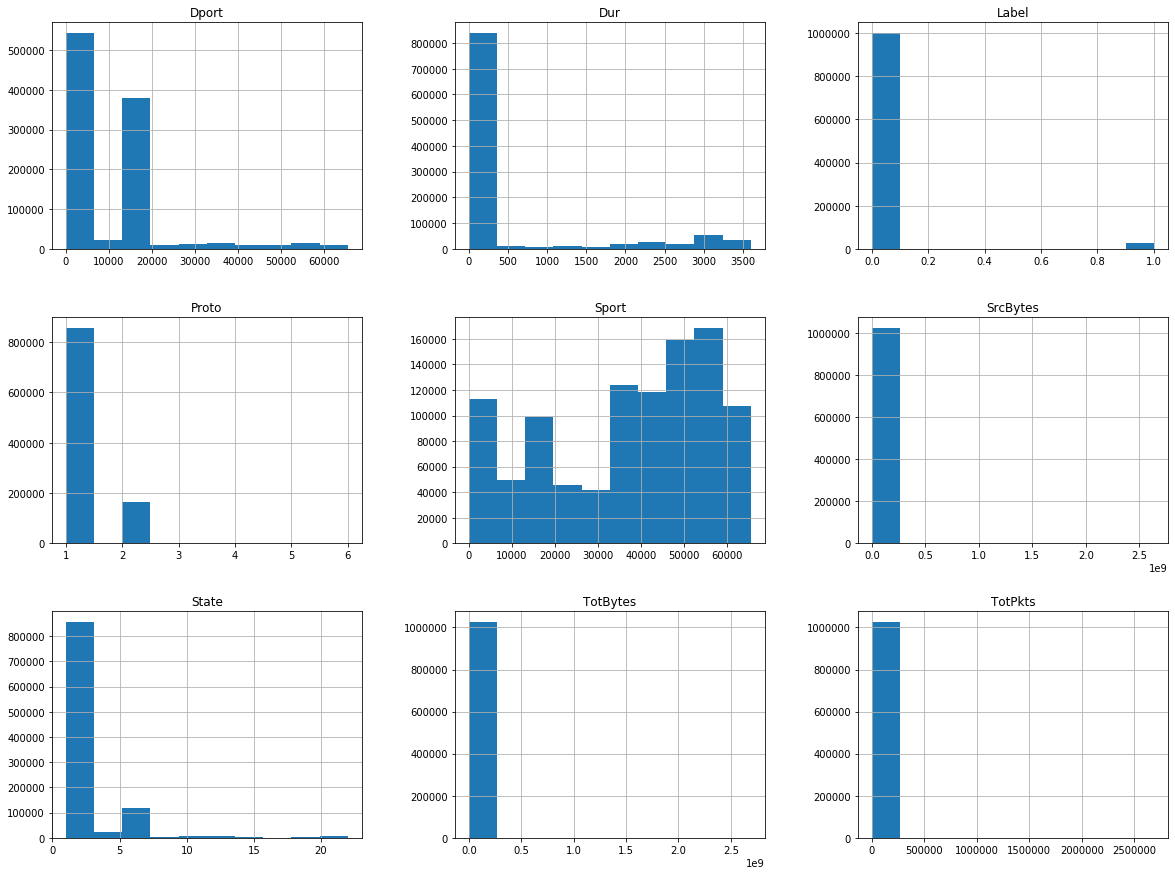

In [10]:
#plot histogram of each parameter
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(figsize = (20,15))

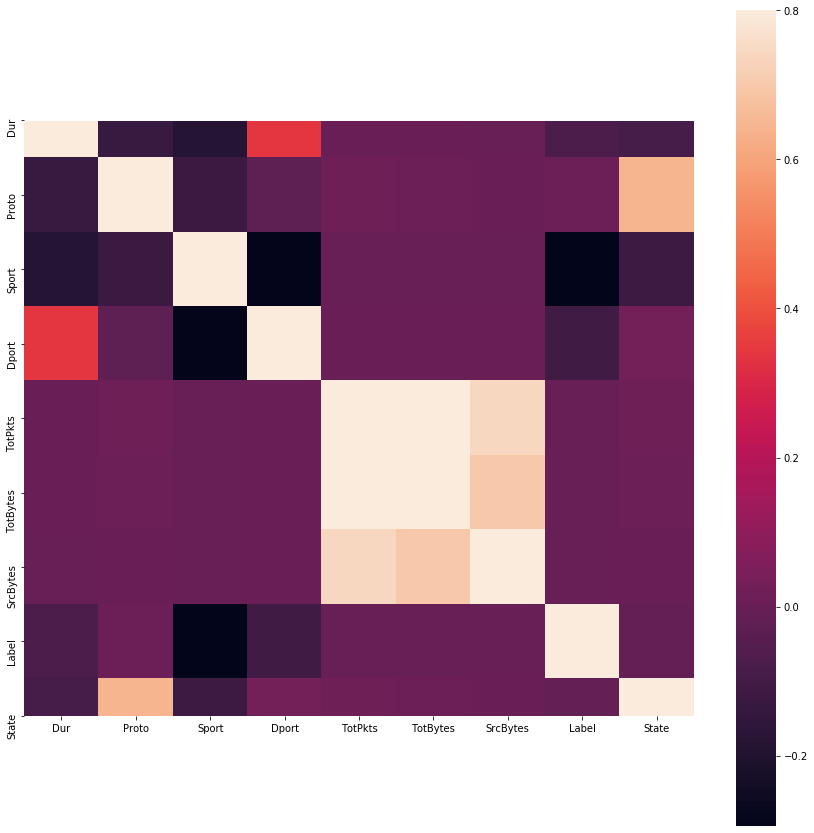

In [11]:
# Correlation matrix 
corrmat = df.corr() 
fig = plt.figure(figsize = (15, 15)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show()

In [12]:
X = df.drop(labels =['Label','State'],axis =1) 
X.shape

(1025681, 7)

In [13]:
y = df['Label']

In [14]:
#stratified shuffling is done to divide the data in equal ration on the basis of parameter label
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 0, stratify =y)

In [15]:
cnt=0
for i in y_test:
  if i==1:
    cnt+=1
print(cnt)

8066


In [16]:
X_train.shape

(717976, 7)

In [17]:
y_test.shape

(307705,)

In [18]:
cnt=0
for i in y_train:
  if i==1:
    cnt+=1
print(cnt)

18819


In [19]:
cnt=0
for i in y_test:
  if i==1:
    cnt+=1
print(cnt)

8066


In [20]:
from sklearn.feature_selection import VarianceThreshold 
filter = VarianceThreshold(0.01) 
X_train = filter.fit_transform(X_train) 
X_test = filter.transform(X_test) 
X_train.shape, X_test.shape 

((717976, 7), (307705, 7))

In [21]:
#as y is a series so y_train and y_test are also series therefore we need to convert them to a numpy array.
y_train = y_train.to_numpy() 
y_test = y_test.to_numpy()

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = GaussianNB()
clf2 = RandomForestClassifier(random_state=42,verbose=2,n_jobs=3,n_estimators=300,max_features = 7,criterion='entropy',class_weight='balanced',max_depth=32)
clf3 = LogisticRegression(penalty='l2', dual=False, tol=0.00000001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight={0:3,1:17}, random_state=42, 
                         solver='saga', max_iter=2000,multi_class='auto', verbose=2, warm_start=False, n_jobs=4, l1_ratio=None)
eclf1 = VotingClassifier(estimators=[('gnb', clf1), ('rf', clf2), ('lr', clf3)], voting='soft')
eclf1 = eclf1.fit(X_train, y_train)
print(eclf1.predict(X_test))


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   10.2s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   42.4s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:  1.3min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed: 10.1min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    0.9s


[0 0 0 ... 0 0 0]


[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    1.9s finished


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = GaussianNB()
clf2 = RandomForestClassifier(random_state=42,verbose=2,n_jobs=3,n_estimators=500,max_features = 7,criterion='entropy',class_weight='balanced',max_depth=40)
clf3 = LogisticRegression(penalty='l2', dual=False, tol=0.00000001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight={0:3,1:17}, random_state=42, 
                         solver='saga', max_iter=1000,multi_class='auto', verbose=2, warm_start=False, n_jobs=4, l1_ratio=None)
eclf1 = VotingClassifier(estimators=[('gnb', clf1), ('rf', clf2), ('lr', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
print(eclf1.predict(X_test))

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   11.2s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   40.8s
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:  2.1min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:  5.0min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:    2.4s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    3.3s finished


[0 0 0 ... 0 0 0]


In [24]:
y_predict =  eclf1.predict(X_test)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:    3.0s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    3.9s finished


In [25]:
y_predict = np.asarray(y_predict)

In [26]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix
conff = confusion_matrix(y_test,y_predict.round())
conff

array([[299632,      7],
       [    91,   7975]], dtype=int64)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_predict.round()))
print(classification_report(y_test.round(),y_predict.round()))

[[299632      7]
 [    91   7975]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    299639
           1       1.00      0.99      0.99      8066

    accuracy                           1.00    307705
   macro avg       1.00      0.99      1.00    307705
weighted avg       1.00      1.00      1.00    307705



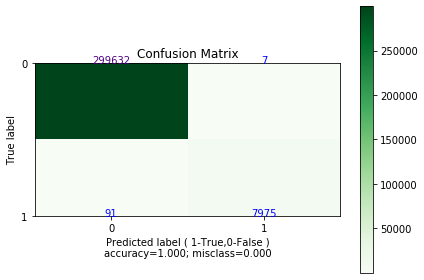

In [29]:
#Plotting Confusion matrix
import sklearn
import itertools
import matplotlib.pyplot as plt
classes = [0,1]
plt.imshow(conff,interpolation='nearest',cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes)
plt.yticks(tick_marks,classes)
accuracy = sklearn.metrics.accuracy_score(y_test,y_predict.round())
misclass =1-accuracy
fmt ='d'
thresh = conff.max()/2
for i, j in itertools.product(range(conff.shape[0]),range(conff.shape[1])):
  plt.text(j,i,format(conff[i,j],fmt),horizontalalignment='center', color="indigo" if conff[i,j]>thresh else "blue")
  plt.tight_layout()
  plt.ylabel('True label')
  #plt.xlabel('Predicted label')
  plt.xlabel('Predicted label ( 1-True,0-False )\naccuracy={:0.3f}; misclass={:0.3f}'.format(accuracy, misclass))

In [30]:
# only 7 normal traffic data out of 299632 are classified as botnet traffic ---> False Positives
# in the same way only 91 botnet traffic are classified as normal traffic. ----> False Negatives

In [31]:
TP = true_positives = 7975
TN = true_negatives = 299632
FP = false_positives = 7
FN = false_negatives = 91

In [32]:
#False Positive rate
FPR = FP/(TN+FP)
print("The flase positive rate of this model is{:.4f}".format(FPR))

The flase positive rate of this model is0.0000


In [33]:
#true negative rate
TNR = TN/(TN+FP)
print("The true negative rate of this model is{:.4f}".format(TNR))

The true negative rate of this model is1.0000


In [34]:
DTR = TP/(TP+FN)
print("The detection rate of the model is: {:.2f}".format(DTR))

The detection rate of the model is: 0.99


In [35]:
# Evaluating the classifier 
# printing every score of the classifier 
y_pred = y_predict.round()
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 


print("The model used is Voting Based classifier")
acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {:.6f}".format(acc)) 

prec = precision_score(y_test, y_pred) 
print("The precision is {:.6f}".format(prec)) 

rec = recall_score(y_test, y_pred) 
print("The recall is {:.6f}".format(rec)) 

f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {:.6f}".format(f1)) 

MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is{:.6f}".format(MCC)) 

The model used is Voting Based classifier
The accuracy is 0.999682
The precision is 0.999123
The recall is 0.988718
The F1-Score is 0.993893
The Matthews correlation coefficient is0.993744


In [36]:
#y_proba = eclf1.predict_proba(X_test)

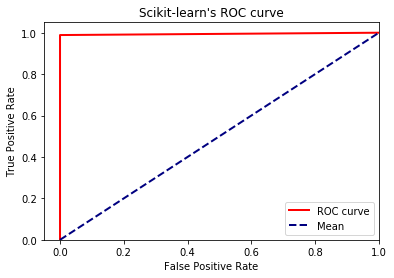

In [37]:
from sklearn import metrics
FPRs, TPRs, _ = metrics.roc_curve(y_test, y_predict)

# Plot the ROC curve
plt.plot(FPRs, TPRs, color='red',lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's ROC curve")
plt.legend(loc="lower right")
plt.show()

In [38]:
auc_score = metrics.roc_auc_score(y_test, y_predict)
print(f"Scikit's ROC-AUC score of DL model is {auc_score: .4f}")

Scikit's ROC-AUC score of DL model is  0.9943


DL: f1=0.994 auc=0.994


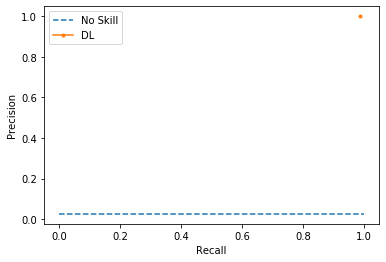

In [39]:
# precision-recall curve and f1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
%matplotlib inline

yhat = y_predict
lr_precision, lr_recall = prec,rec
lr_f1,lr_auc = f1,auc_score
# summarize scores
print('DL: f1=%.3f auc=%.3f' % (lr_f1,lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='DL')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = GaussianNB()
clf2 = RandomForestClassifier(random_state=42,verbose=2,n_jobs=3,n_estimators=1000,max_features = 7,criterion='entropy',class_weight='balanced',max_depth=45)
clf3 = LogisticRegression(penalty='l2', dual=False, tol=0.000000001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight={0:2,1:11}, random_state=42, 
                         solver='saga', max_iter=800,multi_class='auto', verbose=2, warm_start=False, n_jobs=4, l1_ratio=None)
eclf1 = VotingClassifier(estimators=[('gnb', clf1), ('rf', clf2), ('lr', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
print(eclf1.predict(X_test))

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   18.1s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  1.2min
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed:  4.9min
[Parallel(n_jobs=3)]: Done 1000 out of 1000 | elapsed:  7.6min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:  5.4min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:    3.7s
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed:    6.0s
[Parallel(n_jobs=3)]: Done 1000 out of 1000 | elapsed:    9.1s finished


[0 0 0 ... 0 0 0]


In [41]:
y_predict =  eclf1.predict(X_test)
y_predict = np.asarray(y_predict)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    1.6s
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:    3.2s
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed:    7.6s
[Parallel(n_jobs=3)]: Done 1000 out of 1000 | elapsed:   12.9s finished


In [42]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix
conff = confusion_matrix(y_test,y_predict.round())
conff

array([[299630,      9],
       [    89,   7977]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_predict.round()))
print(classification_report(y_test.round(),y_predict.round()))

[[299630      9]
 [    89   7977]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    299639
           1       1.00      0.99      0.99      8066

    accuracy                           1.00    307705
   macro avg       1.00      0.99      1.00    307705
weighted avg       1.00      1.00      1.00    307705



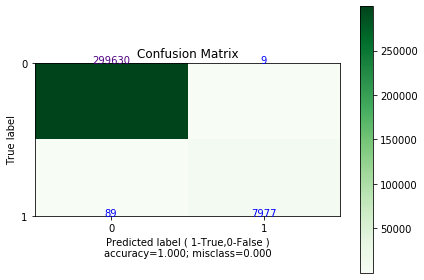

In [45]:
#Plotting Confusion matrix
import sklearn
import itertools
import matplotlib.pyplot as plt
classes = [0,1]
plt.imshow(conff,interpolation='nearest',cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes)
plt.yticks(tick_marks,classes)
accuracy = sklearn.metrics.accuracy_score(y_test,y_predict.round())
misclass =1-accuracy
fmt ='d'
thresh = conff.max()/2
for i, j in itertools.product(range(conff.shape[0]),range(conff.shape[1])):
  plt.text(j,i,format(conff[i,j],fmt),horizontalalignment='center', color="indigo" if conff[i,j]>thresh else "blue")
  plt.tight_layout()
  plt.ylabel('True label')
  #plt.xlabel('Predicted label')
  plt.xlabel('Predicted label ( 1-True,0-False )\naccuracy={:0.3f}; misclass={:0.3f}'.format(accuracy, misclass))

In [46]:
# Evaluating the classifier 
# printing every score of the classifier 
y_pred = y_predict.round()
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 


print("The model used is Voting Based classifier")
acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {:.6f}".format(acc)) 

prec = precision_score(y_test, y_pred) 
print("The precision is {:.6f}".format(prec)) 

rec = recall_score(y_test, y_pred) 
print("The recall is {:.6f}".format(rec)) 

f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {:.6f}".format(f1)) 

MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is{:.6f}".format(MCC)) 

The model used is Voting Based classifier
The accuracy is 0.999682
The precision is 0.998873
The recall is 0.988966
The F1-Score is 0.993895
The Matthews correlation coefficient is0.993744


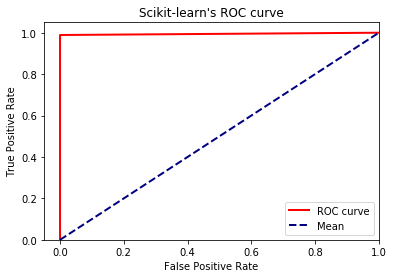

In [47]:
from sklearn import metrics
FPRs, TPRs, _ = metrics.roc_curve(y_test, y_predict)

# Plot the ROC curve
plt.plot(FPRs, TPRs, color='red',lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's ROC curve")
plt.legend(loc="lower right")
plt.show()

In [48]:
auc_score = metrics.roc_auc_score(y_test, y_predict)
print(f"Scikit's ROC-AUC score of DL model is {auc_score: .4f}")

Scikit's ROC-AUC score of DL model is  0.9945


DL: f1=0.994 auc=0.994


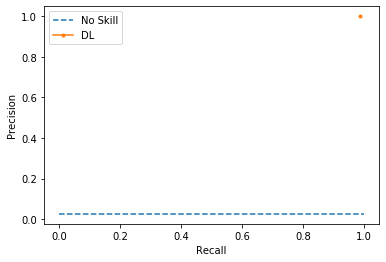

In [49]:
# precision-recall curve and f1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
%matplotlib inline

yhat = y_predict
lr_precision, lr_recall = prec,rec
lr_f1,lr_auc = f1,auc_score
# summarize scores
print('DL: f1=%.3f auc=%.3f' % (lr_f1,lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='DL')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## the dot in the above precision-recall curve indicates that our model is perfect